<a href="https://colab.research.google.com/github/Romilsonlonan/previsao_de_demanda/blob/main/horti_bd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREVISÃO DE DEMANDA 

In [9]:
# Bíbliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
from holidays import WEEKEND, HolidayBase
from dateutil.easter import easter
from dateutil.relativedelta import relativedelta as rd


In [11]:
# Versão pandas
import pandas
pandas.__version__

'1.3.5'

In [12]:
#Criar variável / importar e ler todo o arquivo
df = pd.read_excel("/content/Dados.xlsx")
df.head(46)

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317
5,2022-12-11,685
6,2022-12-12,1366
7,2022-12-13,1213
8,2022-12-14,1055
9,2022-12-15,1343


In [13]:
# Quantidades de linhas e colunas
df.shape

(46, 2)

In [14]:
# Informação do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


In [15]:
# Total de vendas 
# sum(dados["Vendas"])
df["Vendas"].sum()

34750

In [16]:
# propriedades estatísticas mais importantes
df.describe()

,Vendas
count,46.000000
mean,755.434783
std,430.762201
min,18.000000
25%,346.500000
50%,810.500000
75%,1053.750000
max,1692.000000


In [17]:
# média geral de vendas
df['Vendas'].median()

810.5

In [18]:
df['Vendas'].mean()

755.4347826086956

In [19]:
# Vendas com os mesmo valor
df['Vendas'].mode()

0    317
1    821
dtype: int64

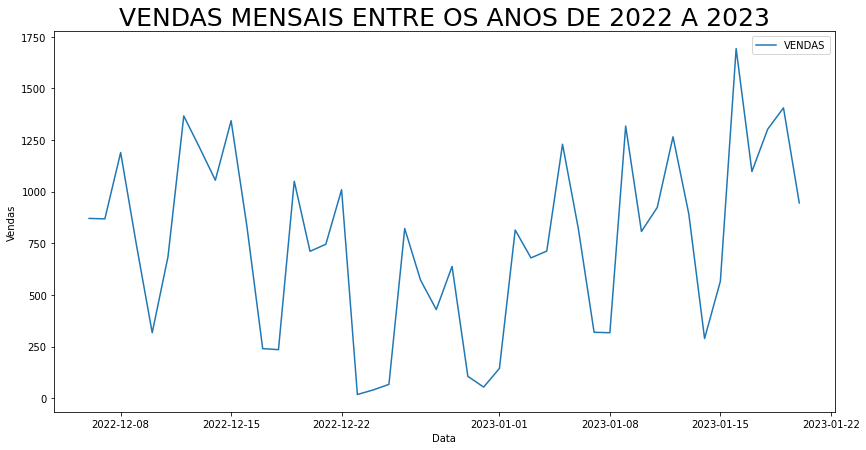

In [20]:
# Visualizando como os dados se comportam
#plt.scatter(dados['Data'], dados['Vendas'])
plt.figure(figsize=(14, 7))
plt.title("VENDAS MENSAIS ENTRE OS ANOS DE 2022 A 2023", fontsize = 25)
plt.plot(df.Data, df.Vendas, label='VENDAS')
plt.ylabel("Vendas")
plt.xlabel("Data")
plt.legend()

plt.show()

In [21]:
# A coluna ds receberá os valores das datas e a coluna “y” o valor numérico a ser previsto
serie_temporal = pd.read_excel('/content/Dados.xlsx', parse_dates = ['Data'], index_col = 0, squeeze = True)
serie_temporal.head()

Data
2022-12-06     870
2022-12-07     868
2022-12-08    1189
2022-12-09     742
2022-12-10     317
Name: Vendas, dtype: int64

In [22]:
# alterando o nome das colunas e salvar isso em um novo dataframe
# A função “.tail(12)” irá retornar as últimas 12 linhas do dataframe
df = pd.DataFrame({'ds': serie_temporal.index, 'y': serie_temporal.values})
df.tail(12)

,ds,y
34,2023-01-09,1317
35,2023-01-10,807
36,2023-01-11,923
37,2023-01-12,1265
38,2023-01-13,892
39,2023-01-14,289
40,2023-01-15,566
41,2023-01-16,1692
42,2023-01-17,1097
43,2023-01-18,1302


In [23]:
# criar um dataframe chamado teste com os últimos 12 meses e um dataframe chamado treino com os dados restantes
treino = df[:34]
teste = df[34:] 

('DataFrame de Treino: {}, entradas \nDataFrame de Testes: {} entradas.'.format(len(treino), len(teste)))

'DataFrame de Treino: 34, entradas \nDataFrame de Testes: 12 entradas.'

In [24]:
# fazer um fit(treinamento) do nosso modelo
# Nosso modelo foi treinado somente com o parâmetro de sazonalidade “seasonality_mode” igual a “multiplicative”. 
# Usamos este parâmetro caso tenhamos uma sazonalidade crescente ao longo do tempo
modelo = Prophet(seasonality_mode = 'multiplicative')
modelo.fit(treino)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
# novo chamado “df_previsoes” usando o dataframe “teste”
df_previsoes = pd.DataFrame({'ds' : teste['ds'].values})
df_previsoes

,ds
0,2023-01-09
1,2023-01-10
2,2023-01-11
3,2023-01-12
4,2023-01-13
5,2023-01-14
6,2023-01-15
7,2023-01-16
8,2023-01-17
9,2023-01-18


In [26]:
# Usando o “df_previsoes” para treinar o modelo e salvamos as previsões na variável “pred”
pred = modelo.predict(df_previsoes)

As previsões do FbProphet retornam um dataframe com várias colunas

yhat = valor médio previsto

yhat_upper = maior valor previsto

yhat_lower = menor valor previsto

In [27]:
# Chamar o dataframe “pred” somente com as colunas que nos interessam
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-09,726.610890,474.561929,997.463117
1,2023-01-10,540.803834,289.658917,816.478818
2,2023-01-11,504.603748,224.240328,772.067074
3,2023-01-12,699.732243,441.858289,952.965708
4,2023-01-13,327.003404,46.220886,576.604655
5,2023-01-14,124.215914,-126.232465,401.486960
6,2023-01-15,191.829496,-64.510057,460.398342
7,2023-01-16,608.147534,320.524999,881.384903
8,2023-01-17,450.531098,147.366536,718.270394
9,2023-01-18,418.316015,173.309118,686.117256


In [28]:
# Prevendo novos dados
# Prevendo os dados para os próximos 5 dias.
# treinar nosso modelo com todos os dados:
modelo = Prophet(seasonality_mode='multiplicative')
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
# Criando um dataframe chamado futuro
futuro = modelo.make_future_dataframe(periods = 5, freq = 'D')
futuro.tail(5)


,ds
46,2023-01-21
47,2023-01-22
48,2023-01-23
49,2023-01-24
50,2023-01-25


In [30]:
# Prevendo novos dados conforme dataframe chamado futuro
pred = modelo.predict(futuro)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
46,2023-01-21,233.991351,-97.906254,559.673281
47,2023-01-22,372.805572,50.485040,689.400419
48,2023-01-23,1316.723728,981.797499,1619.532834
49,2023-01-24,958.847095,650.132193,1269.672518
50,2023-01-25,978.394624,652.270279,1303.910165


Text(53.625, 0.5, 'Valores de Vendas')

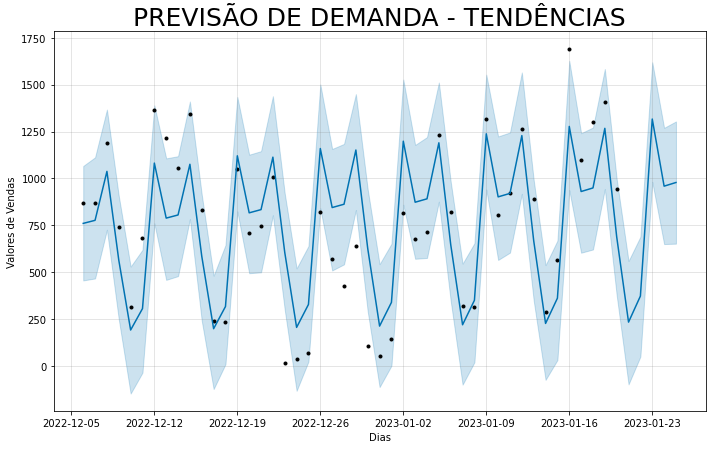

In [31]:
# Visualizando as tendências 
fig = modelo.plot(pred)
plt.title('PREVISÃO DE DEMANDA - TENDÊNCIAS', fontsize = 25)
plt.xlabel('Dias', fontsize = 10)
plt.ylabel('Valores de Vendas', fontsize = 10)

# Nova seção

1.   Item da lista
2.   Item da lista



# Nova seção